In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## uploading my needed csvs

In [2]:
merged_both = pd.read_csv('merged_bins_and_og.csv')

In [3]:
merged_both.head()

,latitude,longitude,date,time,temperature_2m,pressure_msl,cloudcover,shape_binned,duration_binned,year,temperature_binned,pressure_binned,cloudcover_binned,time_binned,date_decade,lat_zone,lon_zone
0,29.88,-97.94,1949-10-10,20:30:00,25.633333,1010.937500,64.125000,elongated,long (30–60m),1949,mild,normal,partly cloudy,evening,1940s,Northern Temperate,Americas East
1,28.98,-96.65,1956-10-10,21:00:00,24.116667,1020.758333,0.708333,round,short (10–30s),1956,mild,high,clear,night,1950s,Northern Temperate,Americas East
2,21.42,-157.80,1960-10-10,20:00:00,25.325000,1014.175000,49.083333,luminous,medium (10–30m),1960,mild,normal,partly cloudy,evening,1960s,Tropics North,Americas West
3,36.60,-82.19,1961-10-10,19:00:00,16.120833,1023.329167,0.166667,round,short event (3–10m),1961,cool,high,clear,evening,1960s,Northern Temperate,Americas East
4,41.12,-73.41,1965-10-10,23:45:00,13.833333,1006.854167,42.041667,other,medium (10–30m),1965,cool,normal,partly cloudy,night,1960s,Northern Temperate,Americas East


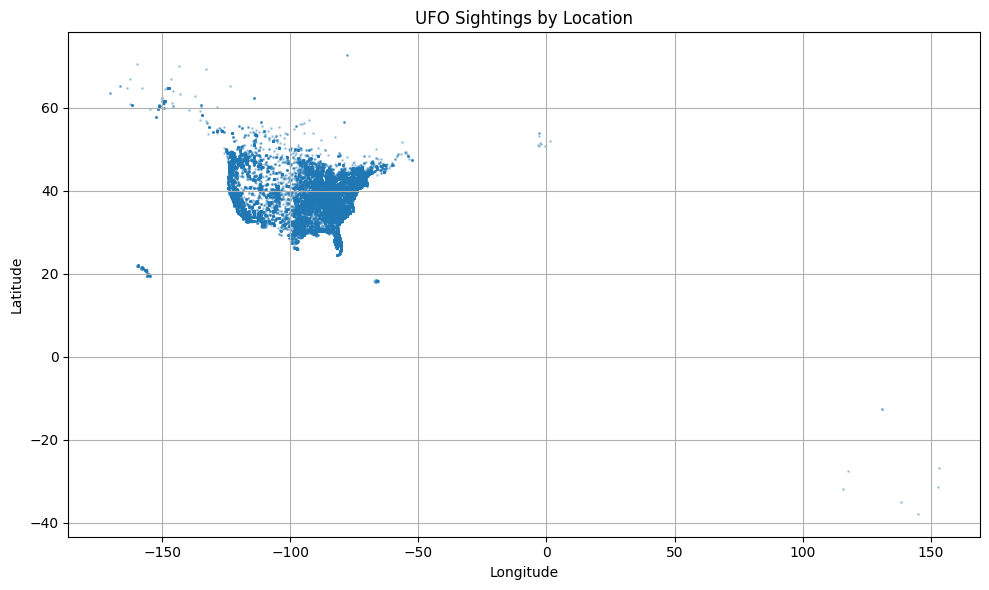

In [4]:
## long vs lat 
plt.figure(figsize=(10, 6))
plt.scatter(merged_both['longitude'], merged_both['latitude'], alpha=0.3, s=1)
plt.title('UFO Sightings by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

## Since the majority of sightings are in the continental US, i am going to get rid of all the sightings outside of it 

In [5]:
#filter to only keep sightings within the continental US boundaries
continental_us = merged_both[
    (merged_both['latitude'] >= 24.5) & (merged_both['latitude'] <= 49.5) &
    (merged_both['longitude'] >= -125) & (merged_both['longitude'] <= -66.5)
]

# Overwrite original DataFrame if desired
merged_both = continental_us.reset_index(drop=True)

print("Sightings kept:", len(merged_both))


Sightings kept: 49457


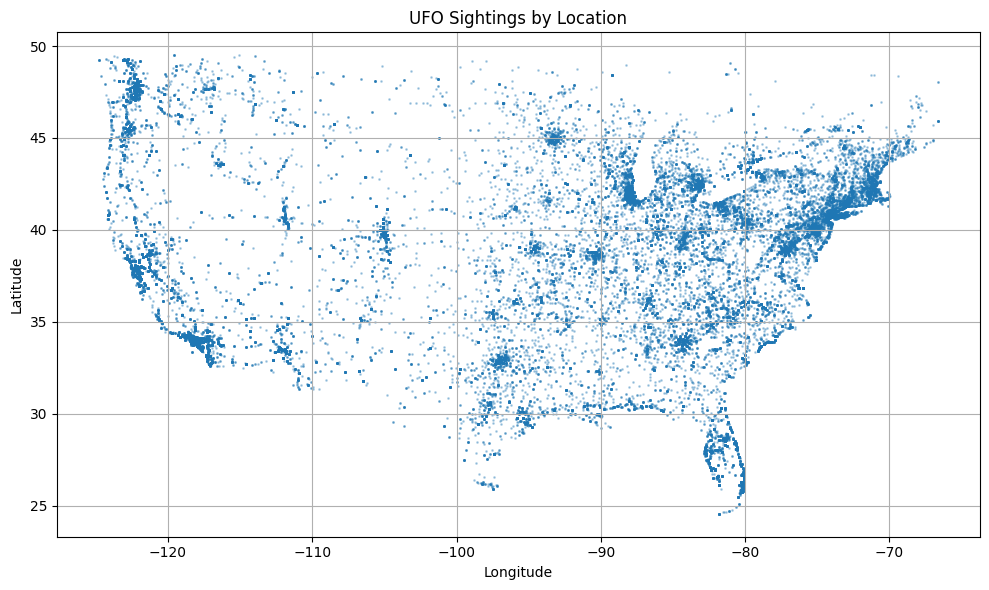

In [6]:
## long vs lat 
plt.figure(figsize=(10, 6))
plt.scatter(merged_both['longitude'], merged_both['latitude'], alpha=0.3, s=1)
plt.title('UFO Sightings by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
merged_both['region'] = merged_both['lat_zone'].astype(str) + "_" + merged_both['lon_zone'].astype(str)

shape_by_region = merged_both.groupby(['region', 'shape_binned']).size().unstack(fill_value=0)
shape_by_region.head()

shape_binned,angular,elongated,irregular,luminous,other,round
region,,,,,,
Northern Temperate_Americas East,7144,2118,2631,14074,6246,10710
Northern Temperate_Americas West,968,289,401,2258,980,1638


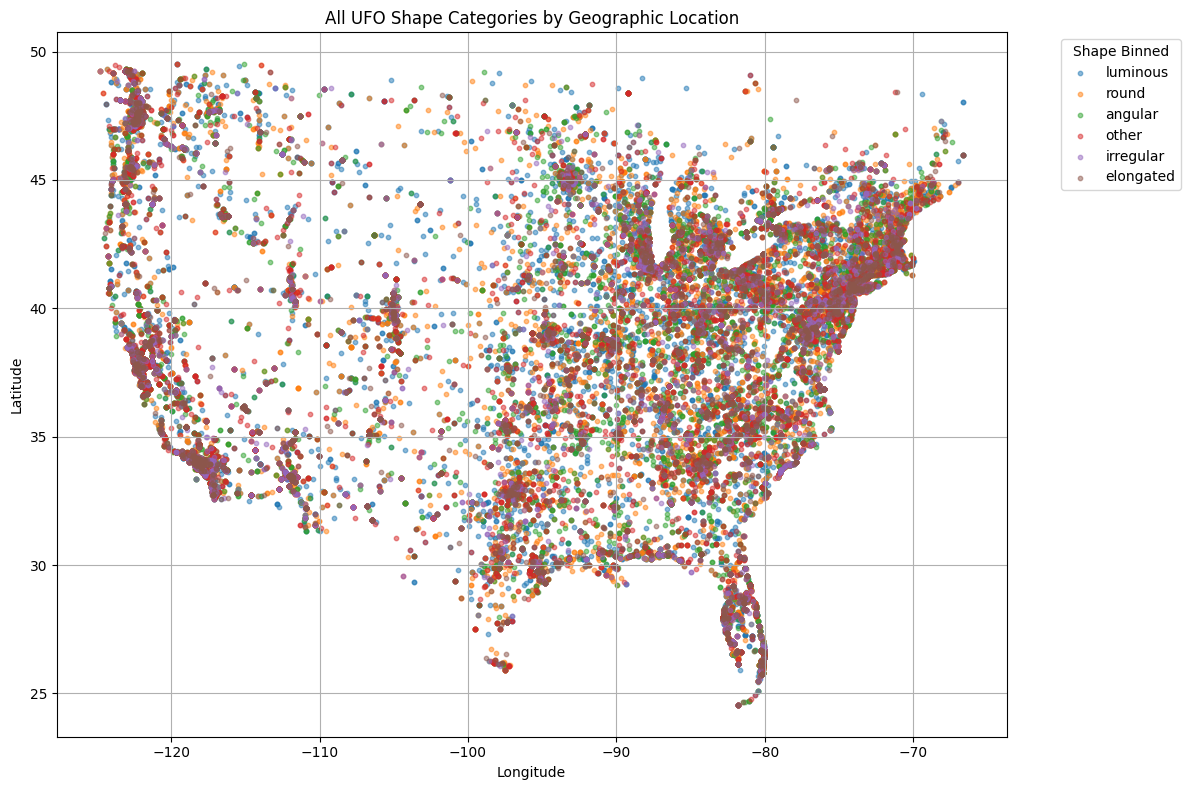

In [8]:
# Get ALL unique shape categories
all_shapes = merged_both['shape_binned'].value_counts().index

# Plot each shape category in a different color
plt.figure(figsize=(12, 8))
for shape in all_shapes:
    subset = merged_both[merged_both['shape_binned'] == shape]
    plt.scatter(subset['longitude'], subset['latitude'], label=shape, alpha=0.5, s=10)

# Plot settings
plt.title("All UFO Shape Categories by Geographic Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Shape Binned", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Lets add some potentially useful attributes

In [9]:
## weekday/weekend attribute 
merged_both['date'] = pd.to_datetime(merged_both['date'], errors='coerce')

# add it to the binned one
merged_both['day_type'] = merged_both['date'].dt.dayofweek.apply(lambda x: 'weekend' if x >= 5 else 'weekday')
merged_both.head()

,latitude,longitude,date,time,temperature_2m,pressure_msl,cloudcover,shape_binned,duration_binned,year,temperature_binned,pressure_binned,cloudcover_binned,time_binned,date_decade,lat_zone,lon_zone,region,day_type
0,29.88,-97.94,1949-10-10,20:30:00,25.633333,1010.937500,64.125000,elongated,long (30–60m),1949,mild,normal,partly cloudy,evening,1940s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday
1,28.98,-96.65,1956-10-10,21:00:00,24.116667,1020.758333,0.708333,round,short (10–30s),1956,mild,high,clear,night,1950s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday
2,36.60,-82.19,1961-10-10,19:00:00,16.120833,1023.329167,0.166667,round,short event (3–10m),1961,cool,high,clear,evening,1960s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday
3,41.12,-73.41,1965-10-10,23:45:00,13.833333,1006.854167,42.041667,other,medium (10–30m),1965,cool,normal,partly cloudy,night,1960s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekend
4,33.59,-86.29,1966-10-10,20:00:00,21.841667,1014.516667,68.500000,other,short event (3–10m),1966,mild,normal,partly cloudy,evening,1960s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday


In [10]:
## rural vs urban attribute 
from sklearn.metrics.pairwise import haversine_distances

# Convert lat/lon to radians for distance calculation
merged_coords_rad = np.radians(merged_both[['latitude', 'longitude']].values)

#list of major U.S. city coordinates (latitude, longitude)
urban_centers_deg = [
    (40.7128, -74.0060),   # New York City, NY
    (34.0522, -118.2437),  # Los Angeles, CA
    (41.8781, -87.6298),   # Chicago, IL
    (29.7604, -95.3698),   # Houston, TX
    (33.4484, -112.0740),  # Phoenix, AZ
    (39.9526, -75.1652),   # Philadelphia, PA
    (29.4241, -98.4936),   # San Antonio, TX
    (32.7157, -117.1611),  # San Diego, CA
    (32.7767, -96.7970),   # Dallas, TX
    (37.3382, -121.8863),  # San Jose, CA
    (30.2672, -97.7431),   # Austin, TX
    (30.3322, -81.6557),   # Jacksonville, FL
    (32.7555, -97.3308),   # Fort Worth, TX
    (39.9612, -82.9988),   # Columbus, OH
    (35.2271, -80.8431),   # Charlotte, NC
    (39.7684, -86.1581),   # Indianapolis, IN
    (37.7749, -122.4194),  # San Francisco, CA
    (47.6062, -122.3321),  # Seattle, WA
    (39.7392, -104.9903),  # Denver, CO
    (38.9072, -77.0369),   # Washington, DC
    (42.3601, -71.0589),   # Boston, MA
    (36.1627, -86.7816),   # Nashville, TN
    (42.3314, -83.0458),   # Detroit, MI
    (31.7619, -106.4850),  # El Paso, TX
    (35.1495, -90.0490),   # Memphis, TN
]
# Convert urban center coordinates to radians
urban_centers_rad = np.radians(urban_centers_deg)

# Compute the haversine distance between each UFO sighting and each urban center
dists = haversine_distances(merged_coords_rad, urban_centers_rad)

# Convert from radians to miles
min_dists_miles = dists.min(axis=1) * 3958.8

# Label as 'urban' if within 30 miles of any major city, otherwise 'rural'
merged_both['area_type'] = np.where(min_dists_miles < 30, 'urban', 'rural')
merged_both.head()

,latitude,longitude,date,time,temperature_2m,pressure_msl,cloudcover,shape_binned,duration_binned,year,temperature_binned,pressure_binned,cloudcover_binned,time_binned,date_decade,lat_zone,lon_zone,region,day_type,area_type
0,29.88,-97.94,1949-10-10,20:30:00,25.633333,1010.937500,64.125000,elongated,long (30–60m),1949,mild,normal,partly cloudy,evening,1940s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday,urban
1,28.98,-96.65,1956-10-10,21:00:00,24.116667,1020.758333,0.708333,round,short (10–30s),1956,mild,high,clear,night,1950s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday,rural
2,36.60,-82.19,1961-10-10,19:00:00,16.120833,1023.329167,0.166667,round,short event (3–10m),1961,cool,high,clear,evening,1960s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday,rural
3,41.12,-73.41,1965-10-10,23:45:00,13.833333,1006.854167,42.041667,other,medium (10–30m),1965,cool,normal,partly cloudy,night,1960s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekend,rural
4,33.59,-86.29,1966-10-10,20:00:00,21.841667,1014.516667,68.500000,other,short event (3–10m),1966,mild,normal,partly cloudy,evening,1960s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday,rural


In [11]:
merged_both.to_csv('merged_all_cols.csv', index = False)

## Lets start modeling again

In [12]:
## droppinh cols 

columns_to_drop = [      
    'latitude',           
    'longitude',          
    'date',               
    'time',               
    'temperature_2m',     
    'pressure_msl',      
    'cloudcover', 
    'year'
]
merged_both = merged_both.drop(columns=columns_to_drop)
merged_both.head()

,shape_binned,duration_binned,temperature_binned,pressure_binned,cloudcover_binned,time_binned,date_decade,lat_zone,lon_zone,region,day_type,area_type
0,elongated,long (30–60m),mild,normal,partly cloudy,evening,1940s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday,urban
1,round,short (10–30s),mild,high,clear,night,1950s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday,rural
2,round,short event (3–10m),cool,high,clear,evening,1960s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday,rural
3,other,medium (10–30m),cool,normal,partly cloudy,night,1960s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekend,rural
4,other,short event (3–10m),mild,normal,partly cloudy,evening,1960s,Northern Temperate,Americas East,Northern Temperate_Americas East,weekday,rural


In [13]:
merged_both.to_csv('merged_for_model.csv', index = False)
## this dataframe has region attribute 

In [14]:
merged_both = merged_both.drop(columns='region')
merged_both.head()

,shape_binned,duration_binned,temperature_binned,pressure_binned,cloudcover_binned,time_binned,date_decade,lat_zone,lon_zone,day_type,area_type
0,elongated,long (30–60m),mild,normal,partly cloudy,evening,1940s,Northern Temperate,Americas East,weekday,urban
1,round,short (10–30s),mild,high,clear,night,1950s,Northern Temperate,Americas East,weekday,rural
2,round,short event (3–10m),cool,high,clear,evening,1960s,Northern Temperate,Americas East,weekday,rural
3,other,medium (10–30m),cool,normal,partly cloudy,night,1960s,Northern Temperate,Americas East,weekend,rural
4,other,short event (3–10m),mild,normal,partly cloudy,evening,1960s,Northern Temperate,Americas East,weekday,rural


In [15]:
merged_both.to_csv('merged_for_model_2.csv', index = False)
## this dataframe DOES NOT HAVE region attribute 

In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [26]:

X = merged_both.drop(columns= 'shape_binned')
y = merged_both['shape_binned']

le = LabelEncoder()
y_encoded = le.fit_transform(y)  

X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.columns = X_encoded.columns.str.replace(r"[\[\]<>]", "", regex=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

C:\Users\Denise Campos\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:16:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.35301253538212696

📊 Classification Report:

              precision    recall  f1-score   support

     angular       0.29      0.09      0.13      1623
   elongated       0.00      0.00      0.00       481
   irregular       0.27      0.00      0.01       606
    luminous       0.38      0.79      0.51      3267
       other       0.33      0.15      0.20      1445
       round       0.29      0.22      0.25      2470

    accuracy                           0.35      9892
   macro avg       0.26      0.21      0.18      9892
weighted avg       0.31      0.35      0.28      9892



## Lets handle the class imbalance maybe that will improve accuracy

In [27]:
from sklearn.utils import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

model.fit(X_train, y_train, sample_weight=sample_weights)

C:\Users\Denise Campos\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:18:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6, ...)

In [28]:
# Predict using the test set
y_pred = model.predict(X_test)

# Evaluate the performance
from sklearn.metrics import accuracy_score, classification_report

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

✅ Accuracy: 0.23877881116053376

📊 Classification Report:

              precision    recall  f1-score   support

     angular       0.23      0.28      0.26      1623
   elongated       0.09      0.31      0.14       481
   irregular       0.07      0.23      0.11       606
    luminous       0.44      0.33      0.38      3267
       other       0.25      0.20      0.22      1445
       round       0.29      0.11      0.15      2470

    accuracy                           0.24      9892
   macro avg       0.23      0.24      0.21      9892
weighted avg       0.30      0.24      0.25      9892



In [31]:
## random forrrest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # handles class imbalance
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("🌲 Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred, target_names=le.classes_))


🌲 Random Forest Accuracy: 0.23119692680954307
              precision    recall  f1-score   support

     angular       0.22      0.24      0.23      1623
   elongated       0.06      0.15      0.09       481
   irregular       0.08      0.17      0.11       606
    luminous       0.40      0.29      0.34      3267
       other       0.20      0.20      0.20      1445
       round       0.28      0.20      0.23      2470

    accuracy                           0.23      9892
   macro avg       0.20      0.21      0.20      9892
weighted avg       0.27      0.23      0.25      9892



In [32]:
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',  # handles class imbalance
    solver='lbfgs',            # good for multinomial problems
    multi_class='multinomial',
    random_state=42
)

log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("📉 Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred, target_names=le.classes_))


C:\Users\Denise Campos\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


📉 Logistic Regression Accuracy: 0.23857662757784068
              precision    recall  f1-score   support

     angular       0.24      0.31      0.27      1623
   elongated       0.10      0.36      0.16       481
   irregular       0.08      0.29      0.12       606
    luminous       0.43      0.37      0.40      3267
       other       0.31      0.16      0.21      1445
       round       0.28      0.04      0.06      2470

    accuracy                           0.24      9892
   macro avg       0.24      0.25      0.20      9892
weighted avg       0.31      0.24      0.24      9892



## While Accuraryc is going down, precision and recall is going up which means the models are slightly improving at predicting the real class, not just predicting the most common class.  Lets further reduce the classes to see if this improves model performance 

In [36]:

group_map = {
    'luminous': 'light',
    'round': 'light',
    'elongated': 'structured',
    'angular': 'structured',
    'irregular': 'weird',
    'other': 'weird'
}

# Create new grouped shape column
merged_both['shape_grouped'] = merged_both['shape_binned'].map(group_map)

# Drop rows with no mapping (shouldn't happen, but just in case)
merged_both = merged_both.dropna(subset=['shape_grouped'])

columns_to_drop = [
    'shape_grouped',
    'shape_binned',# now the new target
]

X = merged_both.drop(columns=columns_to_drop)
y = merged_both['shape_grouped']

In [37]:
# Encode new grouped y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# One-hot encode features
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.columns = X_encoded.columns.str.replace(r"[\[\]<>]", "", regex=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train XGBoost
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

C:\Users\Denise Campos\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:50:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.5744035584310554

📊 Classification Report:

              precision    recall  f1-score   support

       light       0.59      0.95      0.73      5736
  structured       0.31      0.03      0.05      2104
       weird       0.35      0.08      0.12      2052

    accuracy                           0.57      9892
   macro avg       0.42      0.35      0.30      9892
weighted avg       0.48      0.57      0.46      9892



In [38]:
from sklearn.utils import compute_sample_weight

weights = compute_sample_weight(class_weight='balanced', y=y_train)
model.fit(X_train, y_train, sample_weight=weights)
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

C:\Users\Denise Campos\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:55:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.42286696320258793

📊 Classification Report:

              precision    recall  f1-score   support

       light       0.66      0.46      0.55      5736
  structured       0.26      0.40      0.31      2104
       weird       0.26      0.33      0.29      2052

    accuracy                           0.42      9892
   macro avg       0.39      0.40      0.38      9892
weighted avg       0.49      0.42      0.44      9892



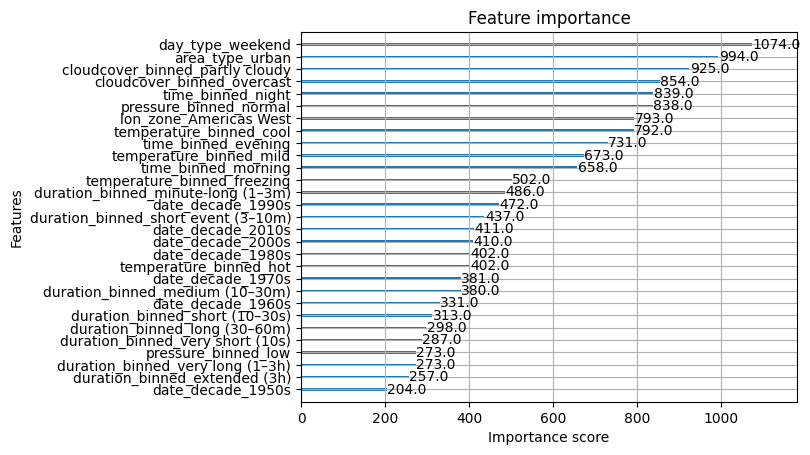

In [39]:
## find feautre importance 
xgb.plot_importance(model)
plt.show()

## it looks like duration bineed for extended and very long look like outliers so we dont happen very often so they add noise. the 1950's date data is very old, so that is possibly noisy aswell. Im going to run the model again but without some of the more noisy features. 

In [41]:
top_features = [
    'day_type_weekend', 'area_type_urban',
    'cloudcover_binned_partly cloudy', 'cloudcover_binned_overcast',
    'time_binned_night', 'pressure_binned_normal',
    'lon_zone_AmericasWest', 'temperature_binned_cool',
    'time_binned_evening', 'temperature_binned_mild',
    'time_binned_morning', 'temperature_binned_freezing',
    'duration_binned_minute-long (1–3m)', 'duration_binned_short event (3–10m)',
    'date_decade_1990s', 'date_decade_2000s', 'date_decade_2010s'
]

valid_features = [col for col in top_features if col in X_encoded.columns]

X_top = X_encoded[valid_features]


X_train, X_test, y_train, y_test = train_test_split(
    X_top, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

model.fit(X_train, y_train, sample_weight=compute_sample_weight(class_weight='balanced', y=y_train))
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


C:\Users\Denise Campos\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:06:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.4291346542660736
              precision    recall  f1-score   support

       light       0.64      0.50      0.56      5736
  structured       0.24      0.30      0.26      2104
       weird       0.27      0.36      0.31      2052

    accuracy                           0.43      9892
   macro avg       0.38      0.39      0.38      9892
weighted avg       0.48      0.43      0.45      9892



# Model,Accuracy,Macro,Avg F1,Comments
XGBoost (original 6 classes), 0.35, 0.18, Most classes underperforming except "luminous"

Logistic Regression, 0.24, 0.20, Performs poorly across all classes

Random Forest, 0.23, 0.20, Similar performance to Logistic

XGBoost (3-group shape), 0.57, 0.30, "Light" class dominates recall (95%), others low

Rebalanced XGBoost (3-group) 0.42, 0.38	, More balanced performance across all 3 groups

In [42]:

final_predictions = pd.DataFrame({
    'y_true': le.inverse_transform(y_test),
    'y_pred': le.inverse_transform(y_pred)
})
final_predictions.to_csv('final_predictions.csv', index=False)

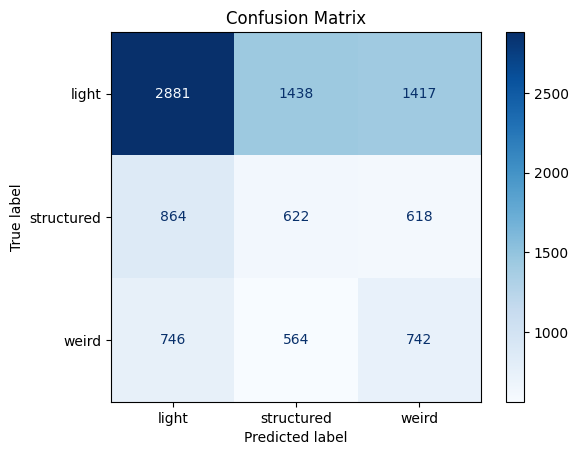

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [44]:
#save model 
import joblib
joblib.dump(model, 'xgb_final_model.pkl')

['xgb_final_model.pkl']

<Figure size 1000x800 with 0 Axes>

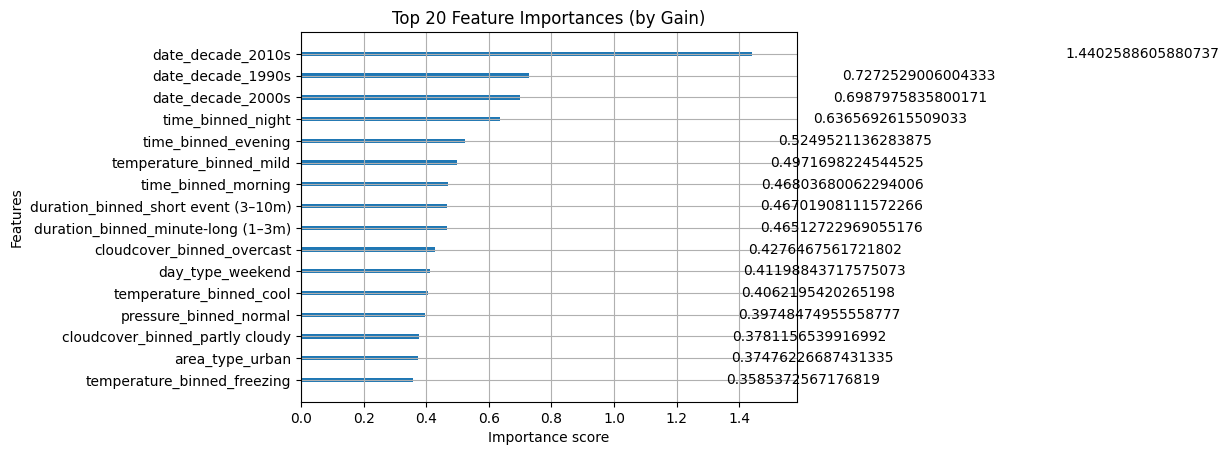

In [45]:
from xgboost import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=20, importance_type='gain')  # 'gain' is best for interpretability
plt.title("Top 20 Feature Importances (by Gain)")
plt.show()

In [48]:
booster = model.get_booster()
importance_dict = booster.get_score(importance_type='gain')

importance_df = pd.DataFrame({
    'feature': list(importance_dict.keys()),
    'gain': list(importance_dict.values())
}).sort_values(by='gain', ascending=False)

importance_df.reset_index(drop=True, inplace=True)
importance_df.head(20)

,feature,gain
0,date_decade_2010s,1.440259
1,date_decade_1990s,0.727253
2,date_decade_2000s,0.698798
3,time_binned_night,0.636569
4,time_binned_evening,0.524952
5,temperature_binned_mild,0.497170
6,time_binned_morning,0.468037
7,duration_binned_short event (3–10m),0.467019
8,duration_binned_minute-long (1–3m),0.465127
9,cloudcover_binned_overcast,0.427647
